# Use decision trees to prepare a model on fraud data : treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

## Data Description :

Undergrad : person is under graduated or not
    
Marital.Status : marital status of a person
    
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
    
Work Experience : Work experience of an individual person
    
Urban : Whether that person belongs to urban area or not

## Decision Tree is 
        the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

Types of Decision Tree
1) C 5.0: It uses entropy (extent of impurity). Hence entropy should be lower.
    Entopy value ranges from 0 to 1 for 2 classes, and 0 to log2(n) for n classes.
    simply, entropy is no. of miscassified samples in otherwise pure region.
    Least entropy variable is taken as root node, whereas variable with 100% entropy is skipped, 
    
    Info gain determines whether to further split the node or not.
    IG = entropy before split - entropy after split
    if IG is +ve then split
    if IG is 0 or -ve dont split
    

        
2) CART: It can be used for both classification and regression. It uses gini index. Gini Index is a score that evaluates how 
        accurate a split is among the classified groups. Gini index evaluates a score in the range between 0 and 1, where 0 is when all observations belong to one class, and 1 is a random distribution of the elements within classes. In this case, we want to have a Gini index score as low as possible. Gini Index is the evaluation metrics we shall use to evaluate our Decision Tree Model. 


Pruning of decision tree: Decsion Tree can grow indefinitely by splitting the features until each example is perfectly classified or algorithm runs out of features. But if tree grows large then many decions would be specific and model will be overfitted to training data. 
    Means, as depth increases, sample size decreases, confidence decreases, overfitting increases.
    Ways to pruning tree: set maximum depth or minimum sample size 

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
 
import sklearn 
from sklearn.model_selection import train_test_split  , KFold , cross_val_score,  GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore') 

In [2]:
#Loading dataset
data = pd.read_csv('Fraud_check.csv')
data.head() 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Descriptive Statistics 

In [3]:
data.isna().sum().sum()

0

In [4]:
data.duplicated().sum()

0

In [5]:
data.shape

(600, 6)

In [6]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


# Feature Engineering

In [8]:
# Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

data1 = data.copy()

list = []
for i in range (0, len(data)):
    if data['Taxable.Income'][i] <= 30000:
        list.append('Risky')
    elif data['Taxable.Income'][i] > 30000:
        list.append('Good')

data1['loan_asset_type'] = list

data1 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,loan_asset_type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [9]:
data1.loan_asset_type.value_counts()

Good     476
Risky    124
Name: loan_asset_type, dtype: int64

# Data Visualization 

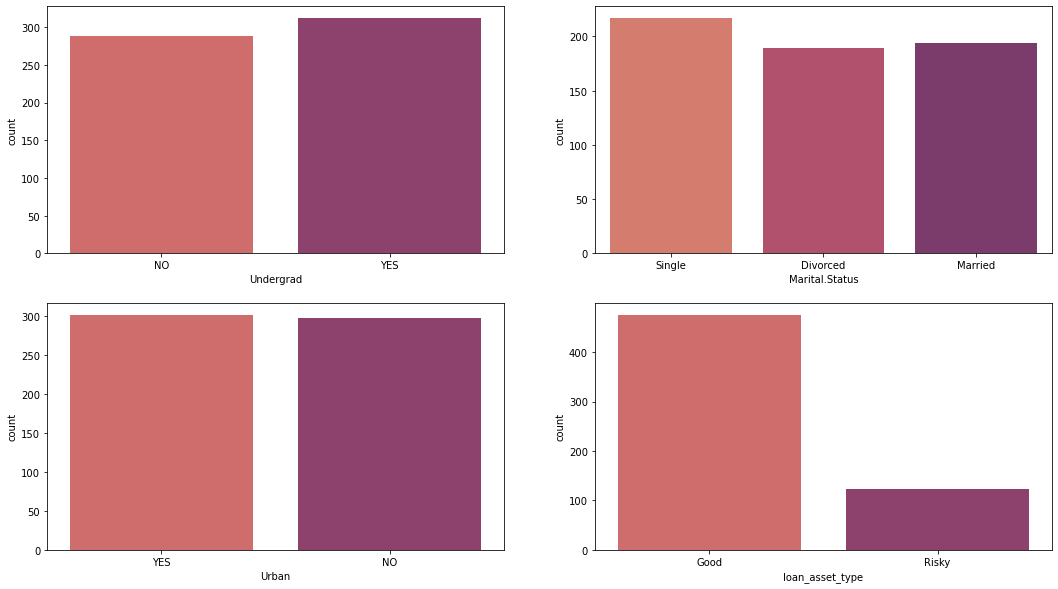

In [10]:
#countplot for categorical variables
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.countplot(data1['Undergrad'], palette='flare')
plt.subplot(2,2,2)
sns.countplot(data1['Marital.Status'], palette='flare')

plt.subplot(2,2,3)
sns.countplot(data1['Urban'], palette='flare')
plt.subplot(2,2,4)
sns.countplot(data1['loan_asset_type'], palette='flare')

plt.show()

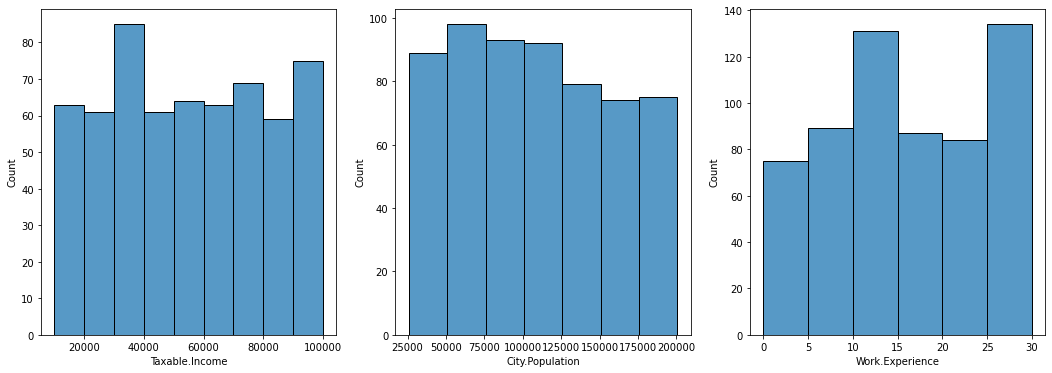

In [11]:
#Histogram for continuous variables

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.histplot(data1['Taxable.Income'], bins=range(min(data1['Taxable.Income']), max(data1['Taxable.Income']) + 10000, 10000))

plt.subplot(1,3,2)
sns.histplot(data1['City.Population'], bins=range(min(data1['City.Population']), max(data1['City.Population']) + 25000, 25000))

plt.subplot(1,3,3)
sns.histplot(data1['Work.Experience'], bins=range(min(data1['Work.Experience']), max(data1['Work.Experience']) + 5, 5) ) 

plt.show()

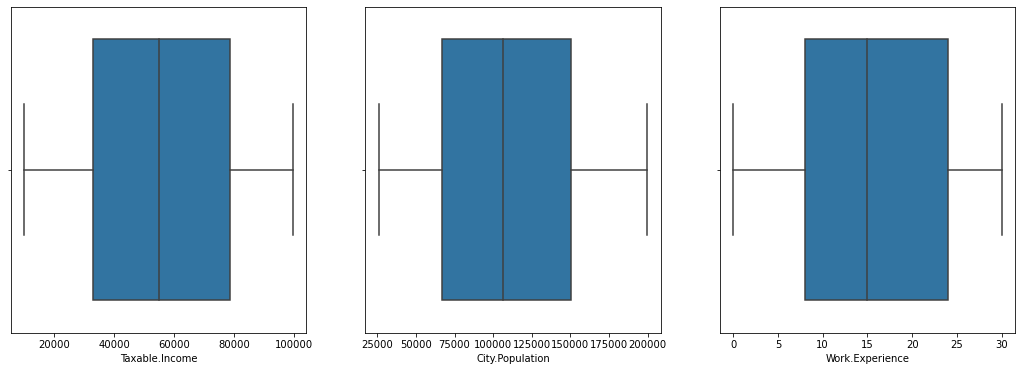

In [12]:
# Box plot for outlier detection
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.boxplot(data1['Taxable.Income'])

plt.subplot(1,3,2)
sns.boxplot(data1['City.Population'])

plt.subplot(1,3,3)
sns.boxplot(data1['Work.Experience'] ) 

plt.show()

# No outliers 

## Univariate Analysis

In [13]:
loan_asset_risky=pd.DataFrame()
loan_asset_good=pd.DataFrame()

loan_asset_risky = data1.loc[data1['loan_asset_type']=='Risky']

loan_asset_good = data1.loc[data1['loan_asset_type']=='Good']


### Taxable income wrt fraud 

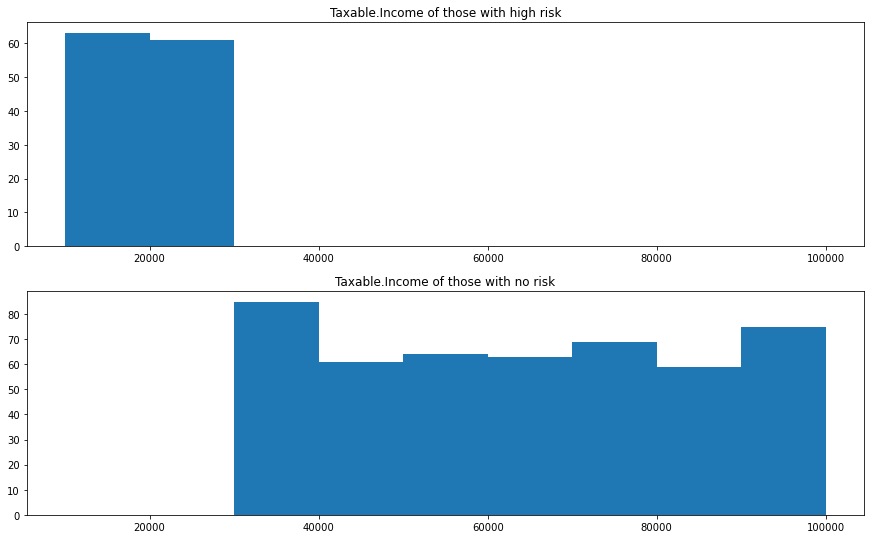

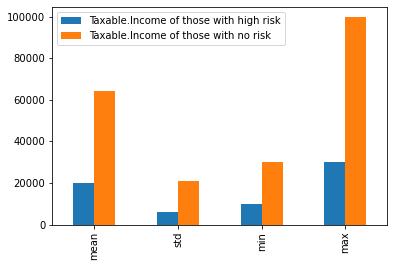

In [14]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(loan_asset_risky['Taxable.Income'], bins=range(min(data1['Taxable.Income']), max(data1['Taxable.Income']) + 10000, 10000))
plt.title('Taxable.Income of those with high risk')

plt.subplot(3,1,2)
plt.hist(loan_asset_good['Taxable.Income'],  bins=range(min(data1['Taxable.Income']), max(data1['Taxable.Income']) + 10000, 10000))
plt.title('Taxable.Income of those with no risk',)



income_describe = pd.DataFrame()

income_describe['Taxable.Income of those with high risk'] = loan_asset_risky['Taxable.Income'].describe()
income_describe['Taxable.Income of those with no risk'] = loan_asset_good['Taxable.Income'].describe()
income_describe  = income_describe.drop(['count', '25%', '50%', '75%'])

plt.subplot(3,1,2)
income_describe.plot.bar()

plt.show() 
 

### Work.Experience wrt fraud

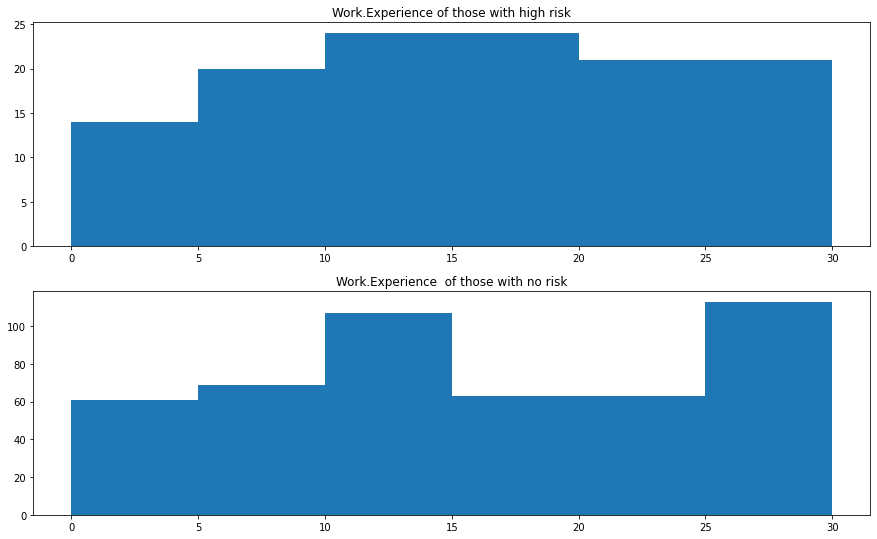

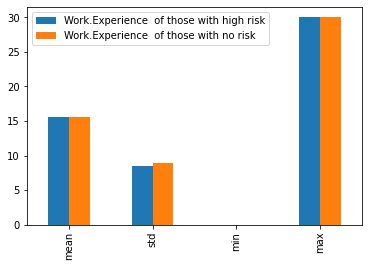

In [15]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(loan_asset_risky['Work.Experience'], bins=range(min(data1['Work.Experience']), max(data1['Work.Experience']) + 5, 5))
plt.title('Work.Experience of those with high risk')

plt.subplot(3,1,2)
plt.hist(loan_asset_good['Work.Experience'],  bins=range(min(data1['Work.Experience']), max(data1['Work.Experience']) + 5, 5))
plt.title('Work.Experience  of those with no risk',)



exp_describe = pd.DataFrame()

exp_describe['Work.Experience  of those with high risk'] = loan_asset_risky['Work.Experience'].describe()
exp_describe['Work.Experience  of those with no risk'] = loan_asset_good['Work.Experience'].describe()
exp_describe = exp_describe.drop(['count', '25%', '50%', '75%'])

plt.subplot(3,1,2)
exp_describe.plot.bar()

plt.show() 
 

### Undergrad edu wrt fraud 

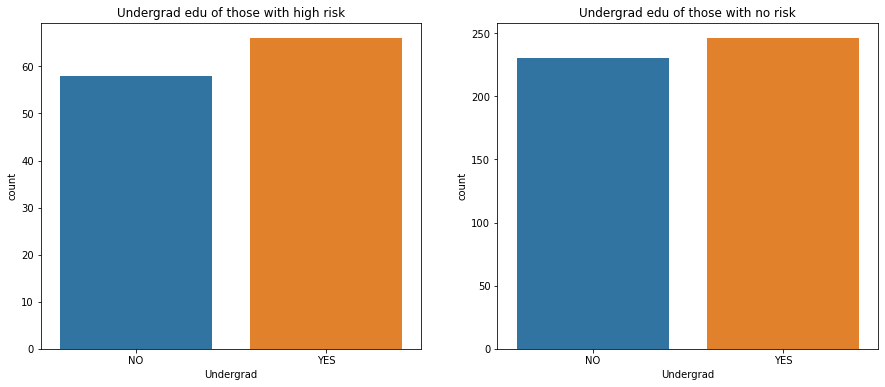

In [16]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(loan_asset_risky['Undergrad'])
plt.title('Undergrad edu of those with high risk')

plt.subplot(1,2,2)
sns.countplot(loan_asset_good['Undergrad'])
plt.title('Undergrad edu of those with no risk',)

plt.show()

### Marital status vs fraud

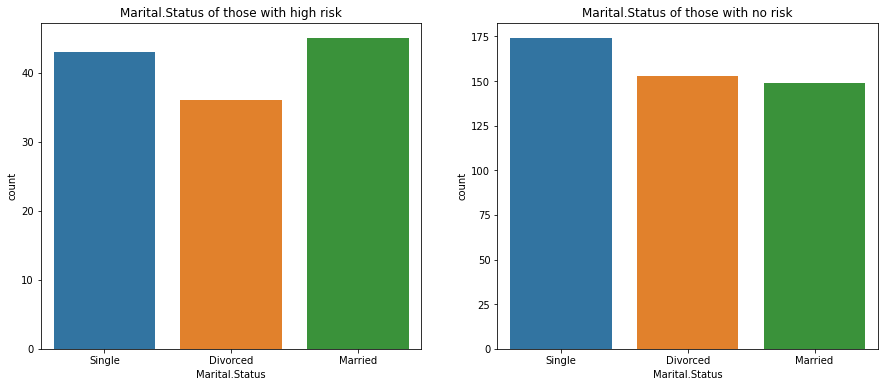

In [17]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(loan_asset_risky['Marital.Status'])
plt.title('Marital.Status of those with high risk')

plt.subplot(1,2,2)
sns.countplot(loan_asset_good['Marital.Status'])
plt.title('Marital.Status of those with no risk',)

plt.show()

### Residence vs fraud

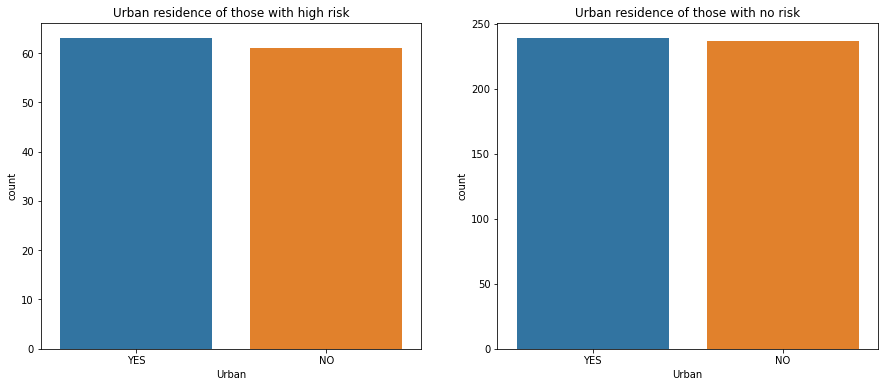

In [18]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(loan_asset_risky['Urban'])
plt.title('Urban residence of those with high risk')

plt.subplot(1,2,2)
sns.countplot(loan_asset_good['Urban'])
plt.title('Urban residence of those with no risk',)

plt.show()

# Data Pre-Processing 

In [19]:
data2 = data1.copy()
data2 = data2.rename(columns={'Undergrad':'undergrad' , 'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income', 'City.Population':'city_population', 'Work.Experience': 'workxp', 'Urban':'urban'})
data2.drop('taxable_income', axis=1, inplace=True)

In [20]:
data2.head()

,undergrad,marital_status,city_population,workxp,urban,loan_asset_type
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [21]:
# encoding categorical variables
#but technique to encode input cat variable and output cat variable is different.
#so lets split data into x and y 

In [22]:
x = data2.drop('loan_asset_type', axis=1)
y = data2['loan_asset_type']

In [23]:
x = pd.get_dummies(x) # encoding input categorical variables

In [24]:
le = LabelEncoder()
y = le.fit_transform(y) # encoding output categorical variables

In [25]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [26]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (480, 9)
Shape of X_test:  (120, 9)
Shape of y_train:  (480,)
Shape of y_test (120,)


# Building Decision Tree Classifier 

## a) using Entropy Criteria with train test split

In [27]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [28]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
preds 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
pd.crosstab(y_test,preds) 
# getting the 2 way table to understand the correct and wrong predictions

col_0,0
row_0,
0,92
1,28


In [30]:
# Accuracy 
np.mean(preds==y_test) 

0.7666666666666667

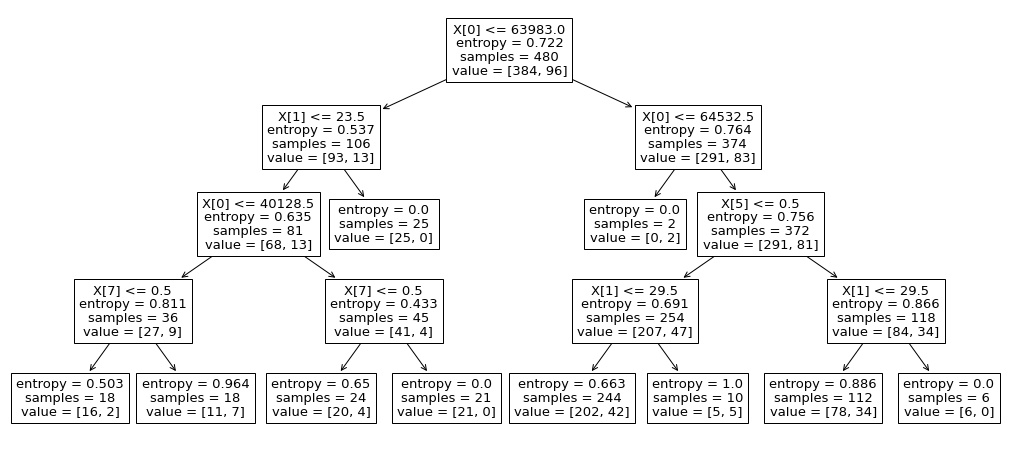

In [31]:
plt.figure(figsize=(18,8)) 
tree.plot_tree(model)
plt.show()

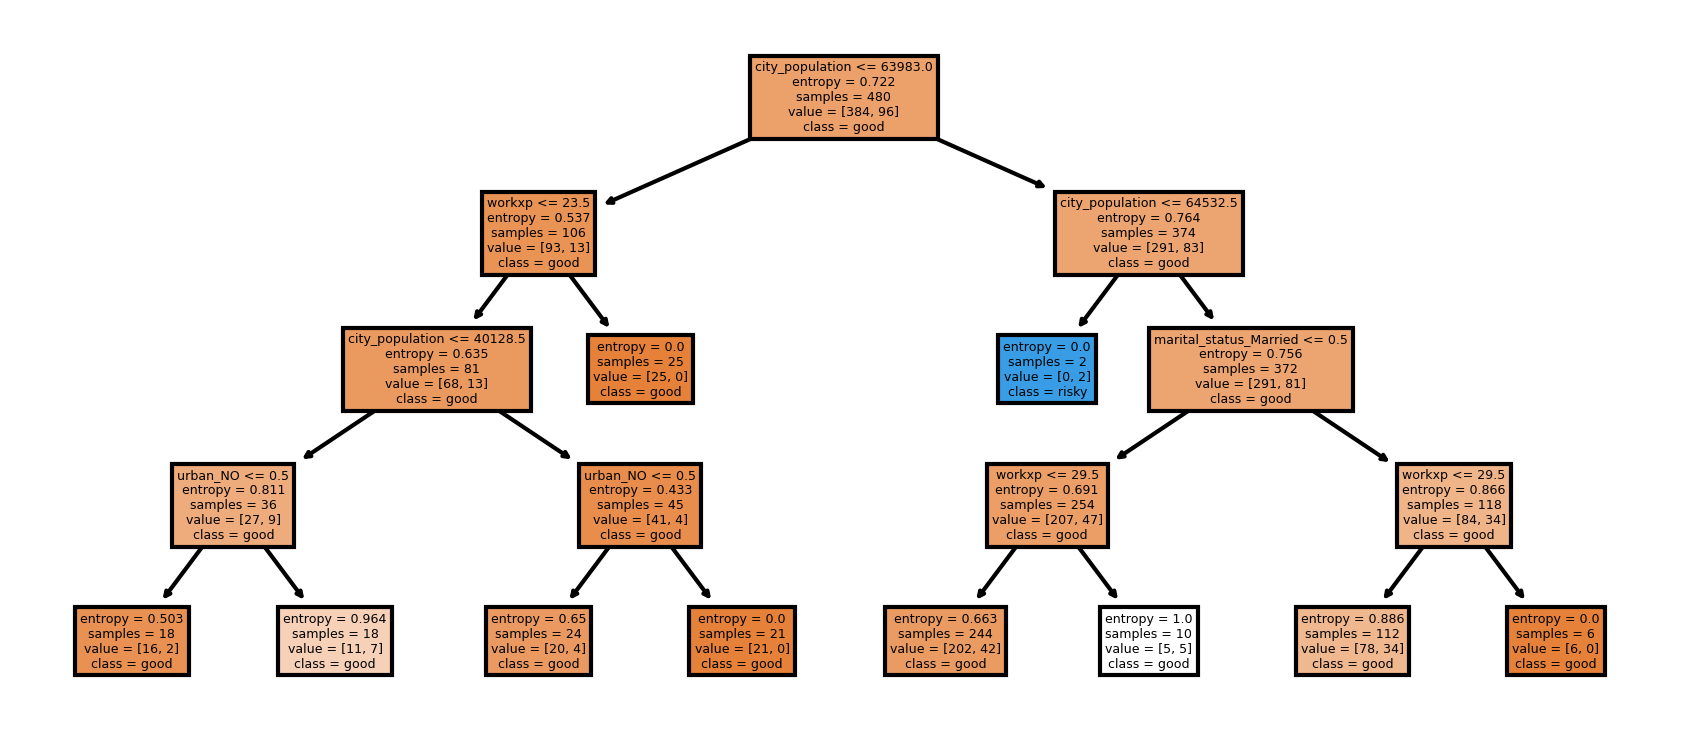

In [32]:
fn=['city_population','workxp','undergrad_NO','undergrad_YES','marital_status_Divorced','marital_status_Married','marital_status_Single','urban_NO','urban_YES']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

## b) using Gini Criteria with train test split

In [33]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4) 

In [34]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=4)

In [35]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.7666666666666667

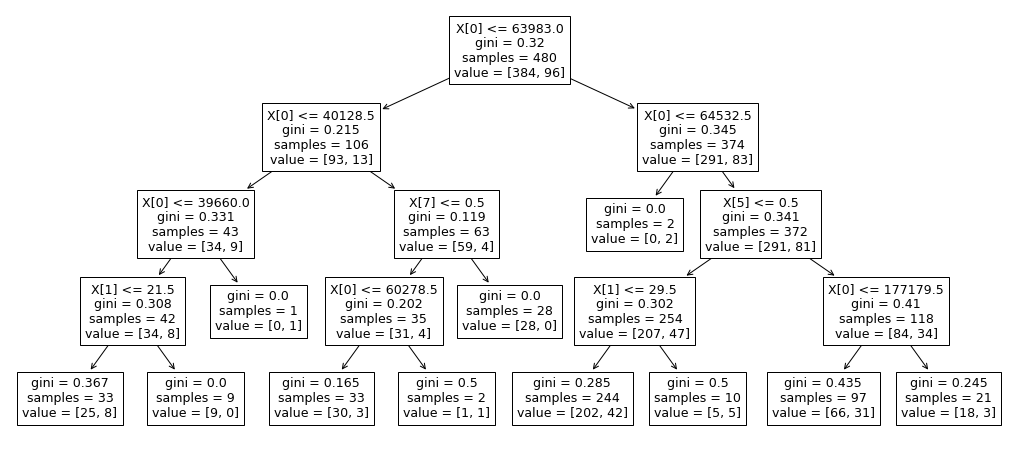

In [36]:
plt.figure(figsize=(18,8))
tree.plot_tree(model_gini)
plt.show()

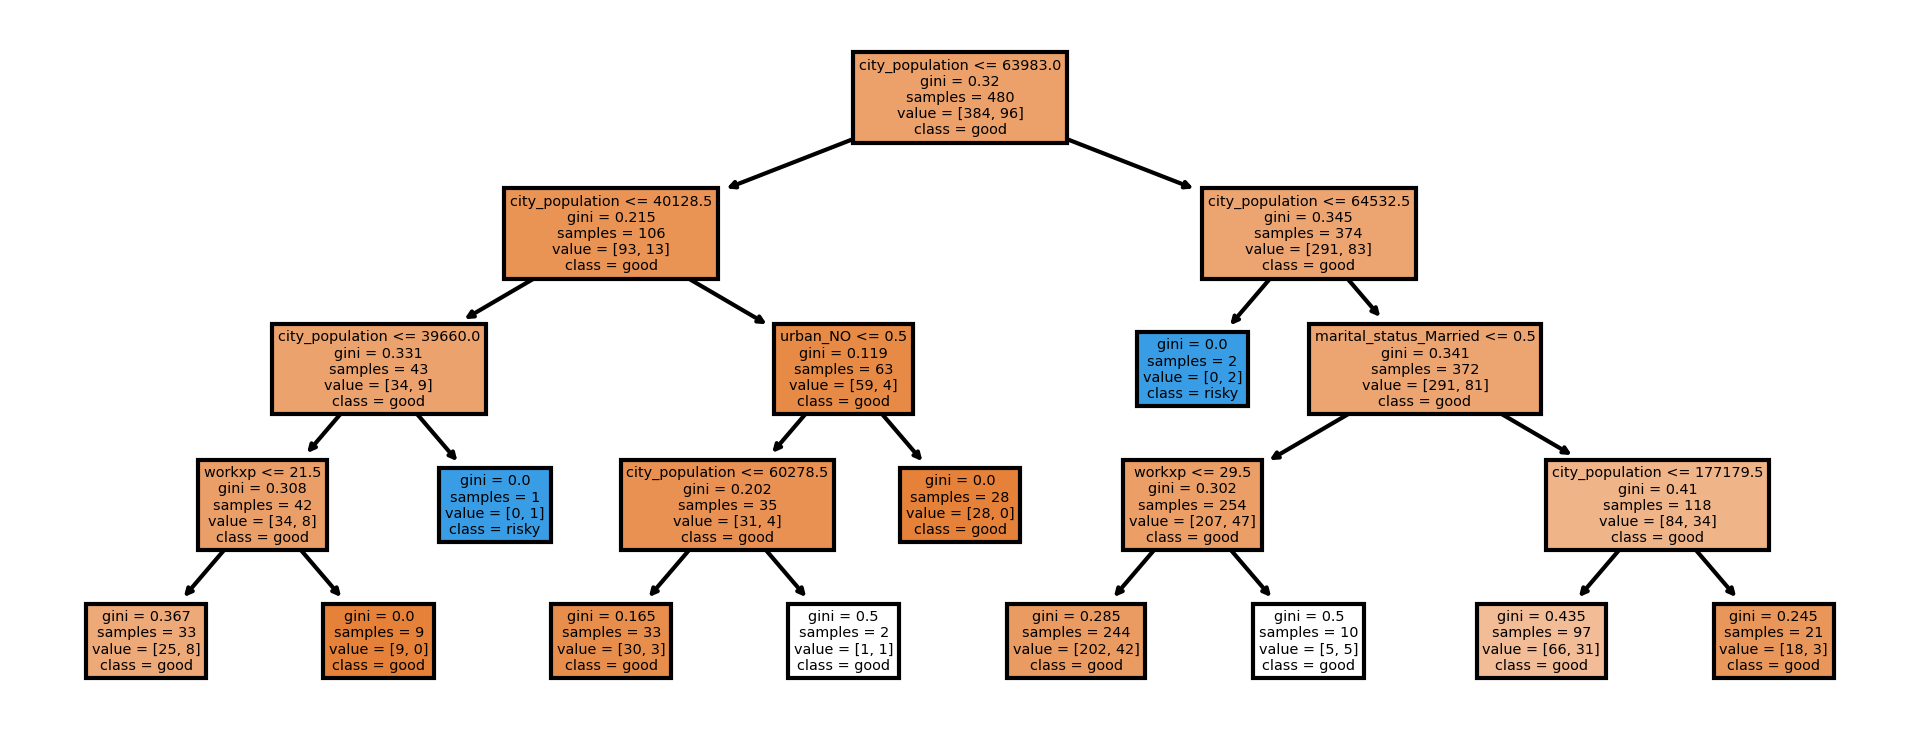

In [37]:
fn=['city_population','workxp','undergrad_NO','undergrad_YES','marital_status_Divorced','marital_status_Married','marital_status_Single','urban_NO','urban_YES']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,3), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

## c) Grid search for hyper parameter tuning

In [38]:
num_folds = 10
kfold = KFold(n_splits=10, shuffle=True)  

In [39]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

In [40]:
DT = DecisionTreeClassifier()
grid = GridSearchCV(DT, param_grid=param_dict, cv=kfold)

grid.fit(x, y) 

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [41]:
print(grid.best_score_)
print(grid.best_params_) 

0.7950000000000002
{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}


## d) Building final model on grid.best_params_ parameters

In [42]:
num_folds = 10
kfold = KFold(n_splits=10, shuffle=True)  

In [43]:
model_kf = grid.best_estimator_
model_kf.fit(x,y)


results = cross_val_score(model_kf, x, y, cv=kfold)
print('Accuracy with k fold validation', np.round(results.mean(),3))  

Accuracy with k fold validation 0.79


In [44]:
model = grid.best_estimator_
model.fit(x_train, y_train)

pred=model.predict(x_test)
print('Accuracy with train test split:', accuracy_score(y_test, pred))

Accuracy with train test split: 0.7666666666666667


In [45]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        92
           1       0.00      0.00      0.00        28

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120



<AxesSubplot:>

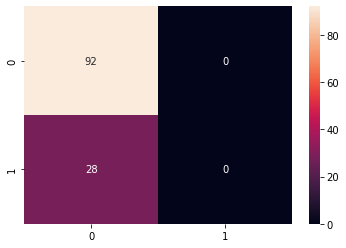

In [46]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

Due to imbalanced dataset our results are getting biased towards the majority. The model is correctly classifying all the majority classes yet fails to classify the minority classes. 

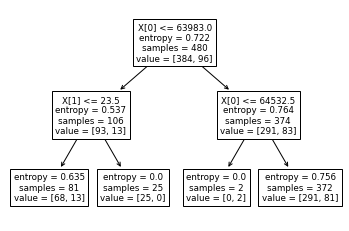

In [47]:
#PLot the decision tree
tree.plot_tree(model_kf)

plt.show()

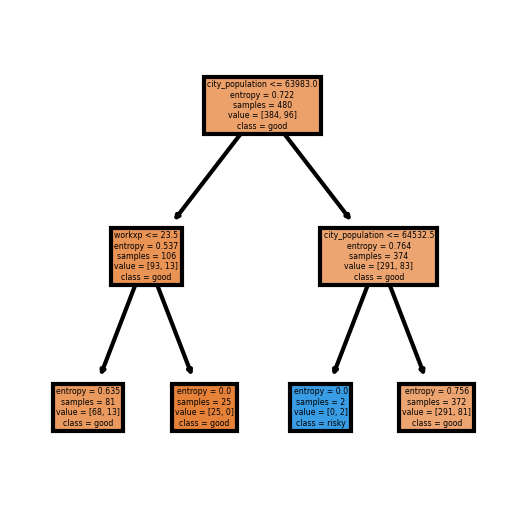

In [48]:
fn=['city_population','workxp','undergrad_NO','undergrad_YES','marital_status_Divorced','marital_status_Married','marital_status_Single','urban_NO','urban_YES']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(model_kf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Thank You  